# Preprocessing
## General stuff
*(Loading data, prepare for future working)*

In [11]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [13]:
# ############LOADING BASEDATASET #########################

data_folder = "../data"
dataset = "credit_train"
file_type = ".csv"
df = pd.read_csv(data_folder+"/"+dataset+file_type)

In [3]:
# removing unwanted features like LOanID and CustomerID
df = df.drop(df[['Loan ID', 'Customer ID']], axis=1)

In [4]:
# Drop record if it does not have at least 'n' values that are **not** NaN out of 17 columns
# finding val of 'n', we will see how many records are dropped at each threshlod val
threshold = 0

for i in range(1, 18):
    mod_df = df.dropna(thresh=i)
    total_rows = mod_df.shape[0]
    if total_rows < 1: 
        break
    else: 
        threshold = i
        
threshold

17

In [5]:
# remove NAN values from the dataframe
df = df.dropna(thresh=threshold)

In [6]:
# Convert Loan Status to 0 or 1
df['Loan Status'] = [0 if x == 'Fully Paid' else 1 for x in  df['Loan Status']]

In [7]:
# encode features
label_encoder = preprocessing.LabelEncoder()
df['Loan Status'] = df['Loan Status'].astype(np.str)
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status']).astype(np.float64)

label_encoder1 = preprocessing.LabelEncoder()
df['Term'] = label_encoder1.fit_transform(df['Term']).astype(np.float64)

encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()
#df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 20 columns):
Home Ownership_HaveMortgage     36423 non-null float64
Home Ownership_Home Mortgage    36423 non-null float64
Home Ownership_Own Home         36423 non-null float64
Home Ownership_Rent             36423 non-null float64
Purpose_Business Loan           36423 non-null float64
Purpose_Buy House               36423 non-null float64
Purpose_Buy a Car               36423 non-null float64
Purpose_Debt Consolidation      36423 non-null float64
Purpose_Educational Expenses    36423 non-null float64
Purpose_Home Improvements       36423 non-null float64
Purpose_Medical Bills           36423 non-null float64
Purpose_Other                   36423 non-null float64
Purpose_Take a Trip             36423 non-null float64
Purpose_major_purchase          36423 non-null float64
Purpose_moving                  36423 non-null float64
Purpose_other                   36423 non-null float64
Purpose_ren

In [8]:
import importlib.util
spec = importlib.util.spec_from_file_location("module.name", "../functions.py")
functions = importlib.util.module_from_spec(spec)
spec.loader.exec_module(functions)

In [9]:
# Apply functions
df['Years in current job'] = df['Years in current job'].apply(functions.f).astype(np.float64)
df['Credit Score'] = df['Credit Score'].apply(functions.cs)

# #fill NaN values groupby more related column
df['Credit Score'].fillna(value=df.groupby('Home Ownership')['Credit Score'].transform('median'), inplace=True)
df['Annual Income'].fillna(value=df.groupby('Purpose')['Annual Income'].transform('median'), inplace=True)
df['Years in current job'].fillna(value=df.groupby('Home Ownership')['Years in current job'].transform('median'),
                                  inplace=True)
df['Months since last delinquent'].fillna(0, inplace=True)
df['Maximum Open Credit'].fillna(value=df.groupby('Home Ownership')['Maximum Open Credit'].transform('median'),
                                 inplace=True)
df['Bankruptcies'].fillna(0, inplace=True)
df['Tax Liens'].fillna(0, inplace=True)

df["Monthly Income"] = df.apply(lambda row: functions.mi(row), axis=1)
df["Credit Ration per Year"]= df.apply(lambda row: functions.cr(row), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 19 columns):
Loan Status                     36423 non-null float64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens    

In [10]:
# merging categorical encoded dataframe with the main dataframe and deleting unwanted features
df = df.reset_index(drop=True).merge(encoded.reset_index(drop=True), left_index=True, right_index=True)
# remove it from the dataframe so it only contains the features that our model should use
df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)
df.head(10)

Loan Status  Current Loan Amount  Term  Credit Score  Annual Income  \
0          0.0           99999999.0   1.0         741.0      2231892.0   
1          0.0             217646.0   1.0         730.0      1184194.0   
2          0.0             548746.0   1.0         678.0      2559110.0   
3          0.0           99999999.0   1.0         728.0       714628.0   
4          0.0           99999999.0   1.0         740.0       776188.0   
5          0.0             234124.0   1.0         727.0       693234.0   
6          0.0             666204.0   0.0         723.0      1821967.0   
7          1.0             317108.0   0.0         687.0      1133274.0   
8          0.0             465410.0   0.0         688.0      1722654.0   
9          0.0           99999999.0   1.0         746.0      1749748.0   

   Years in current job  Monthly Debt  Years of Credit History  \
0                   8.0      29200.53                     14.9   
1                   0.0      10855.08                     19.6   
2                   2.0      18660.28                     22.6   
3                   3.0      11851.06                     16.0   
4                   0.0      11578.22                      8.5   
5                  10.0      14211.24                     24.7   
6                  10.0      17612.24                     22.0   
7                   8.0       9632.81                     17.4   
8                   3.0      15647.45                     22.3   
9                  10.0      19247.19                     20.0   

   Months since last delinquent  Number of Open Accounts  ...  \
0                          29.0                     18.0  ...   
1                          10.0                     13.0  ...   
2                          33.0                      4.0  ...   
3                          76.0                     16.0  ...   
4                          25.0                      6.0  ...   
5                          46.0                     10.0  ...   
6                          34.0                     15.0  ...   
7                          53.0                      4.0  ...   
8                          30.0                      7.0  ...   
9                          32.0                     17.0  ...   

   Purpose_Medical Bills  Purpose_Other  Purpose_Take a Trip  \
0                    0.0            0.0                  0.0   
1                    0.0            0.0                  0.0   
2                    0.0            0.0                  0.0   
3                    0.0            0.0                  0.0   
4                    0.0            0.0                  0.0   
5                    0.0            0.0                  0.0   
6                    0.0            0.0                  0.0   
7                    0.0            0.0                  0.0   
8                    0.0            0.0                  0.0   
9                    0.0            0.0                  0.0   

   Purpose_major_purchase  Purpose_moving  Purpose_other  \
0                     0.0             0.0            0.0   
1                     0.0             0.0            0.0   
2                     0.0             0.0            0.0   
3                     0.0             0.0            0.0   
4                     0.0             0.0            0.0   
5                     0.0             0.0            0.0   
6                     0.0             0.0            0.0   
7                     0.0             0.0            0.0   
8                     0.0             0.0            0.0   
9                     0.0             0.0            0.0   

   Purpose_renewable_energy  Purpose_small_business  Purpose_vacation  \
0                       0.0                     0.0               0.0   
1                       0.0                     0.0               0.0   
2                       0.0                     0.0               0.0   
3                       0.0                     0.0               0.0   
4             

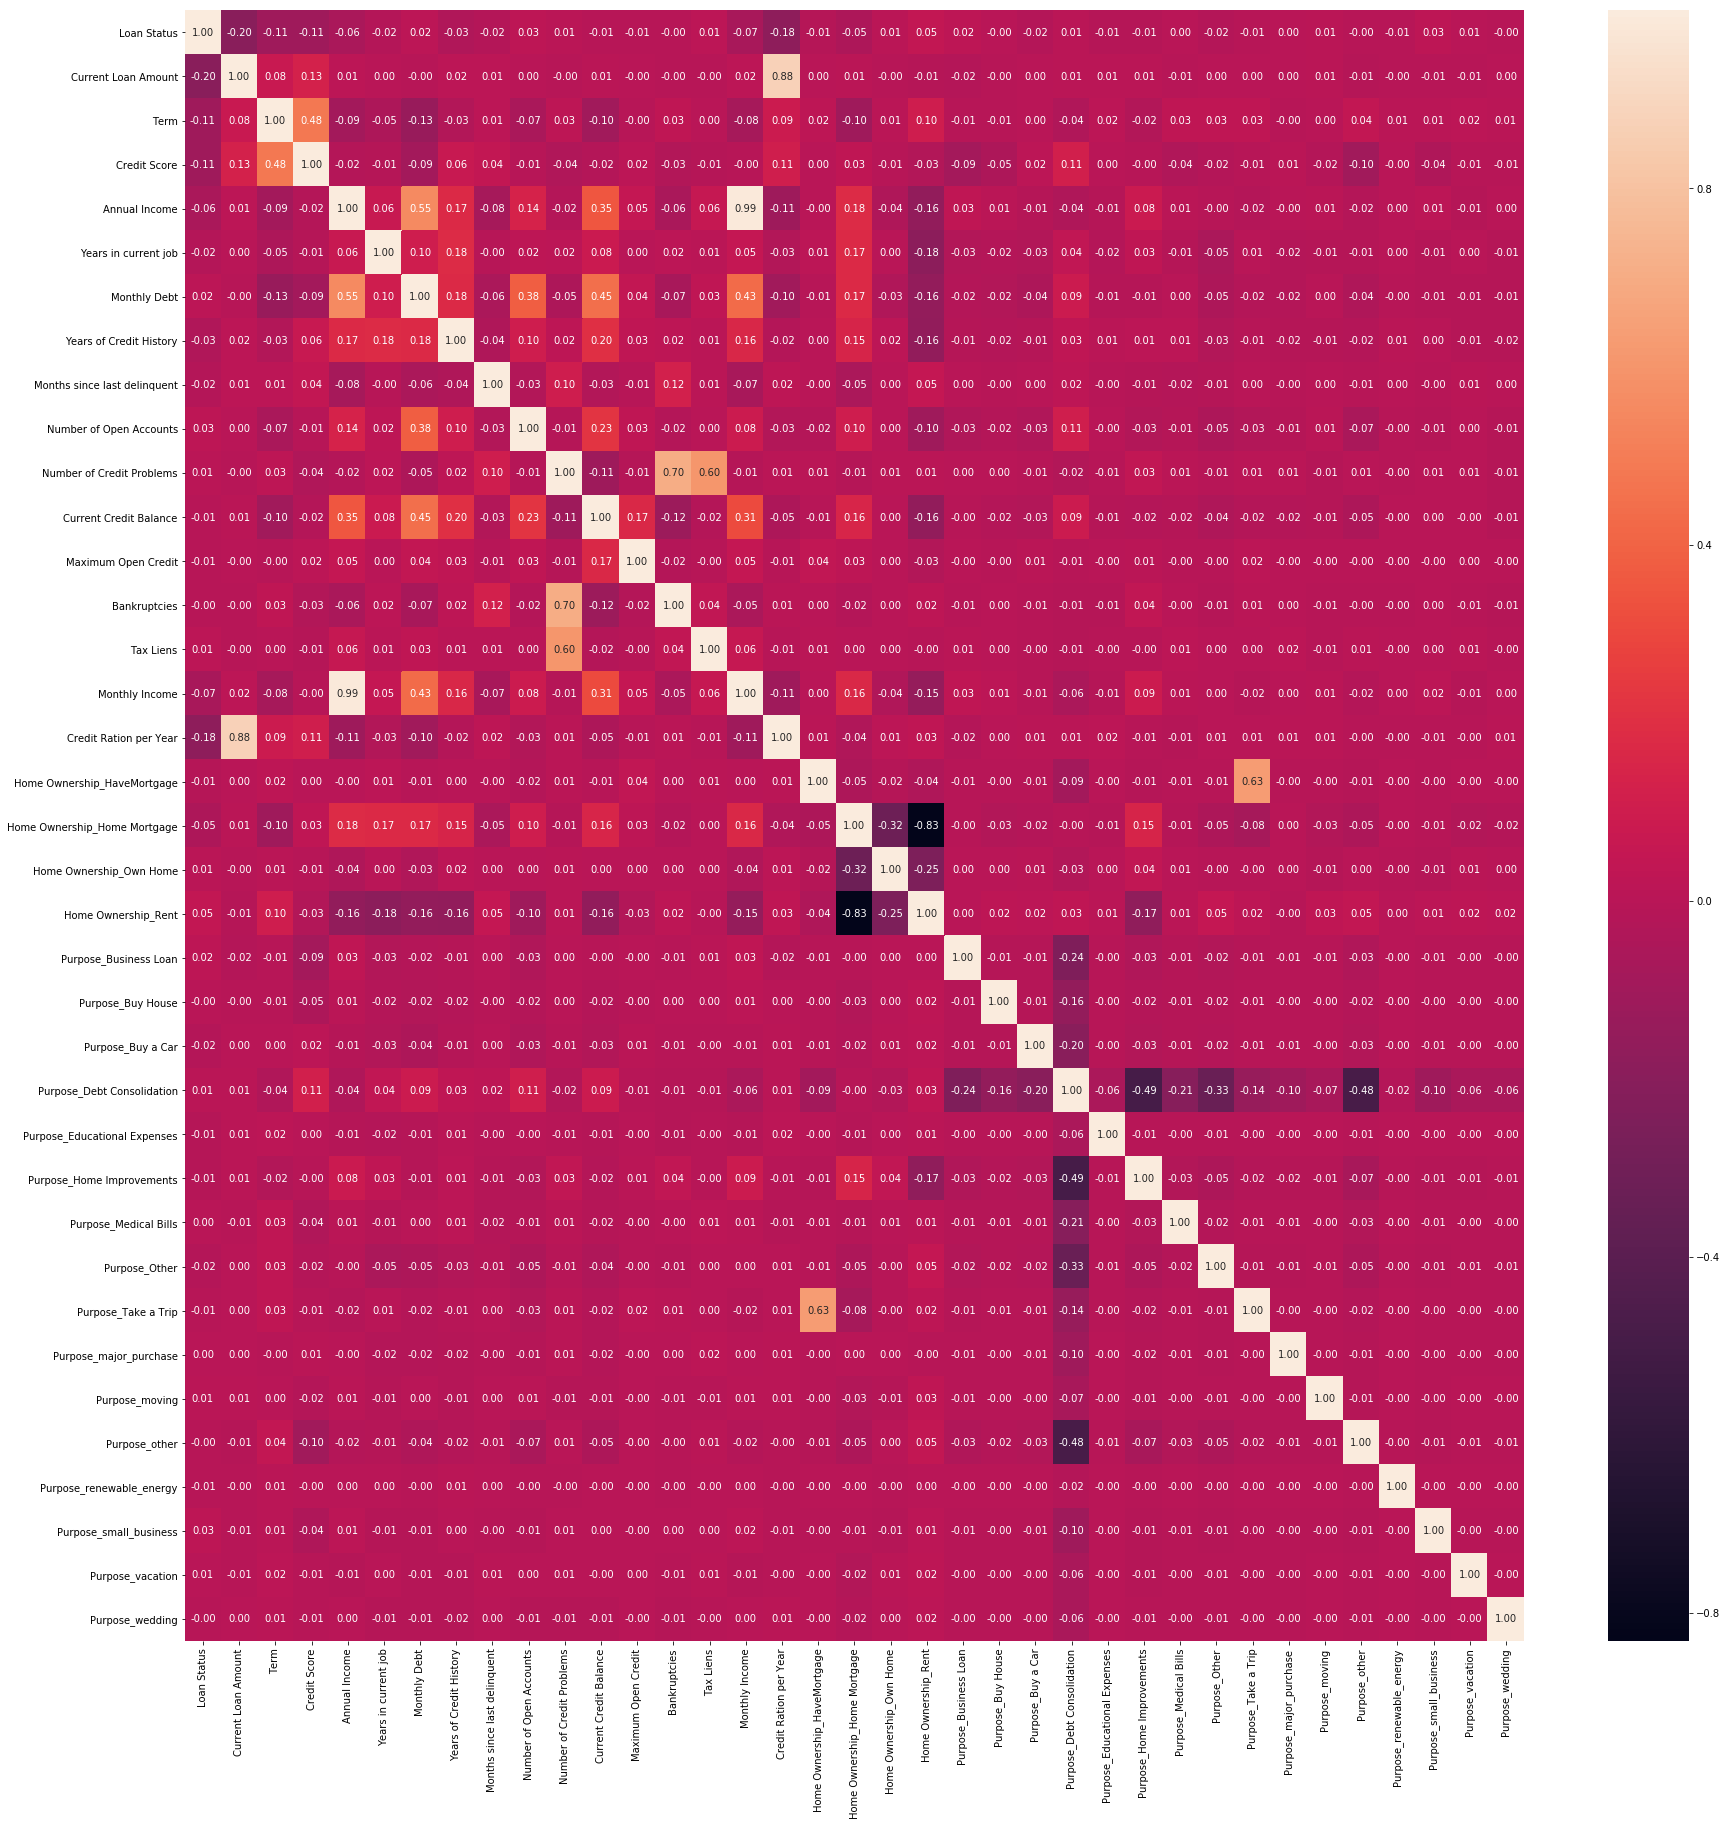

In [11]:
# show correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [12]:
#save as processed 
df.to_csv(data_folder + "/" + dataset + "_processed" + file_type)

## Basic cleaning
*(remove outliers)*

In [13]:
#Decide which categorical variables you want to use in model

for col_name in df.columns:
        unique_cat = len(df[col_name].unique())
        print("Feature {0} has {1} unique categories".format(col_name, unique_cat))
df.info()

Feature Loan Status has 2 unique categories
Feature Current Loan Amount has 13914 unique categories
Feature Term has 2 unique categories
Feature Credit Score has 167 unique categories
Feature Annual Income has 20645 unique categories
Feature Years in current job has 11 unique categories
Feature Monthly Debt has 27103 unique categories
Feature Years of Credit History has 452 unique categories
Feature Months since last delinquent has 108 unique categories
Feature Number of Open Accounts has 46 unique categories
Feature Number of Credit Problems has 11 unique categories
Feature Current Credit Balance has 18486 unique categories
Feature Maximum Open Credit has 22109 unique categories
Feature Bankruptcies has 8 unique categories
Feature Tax Liens has 10 unique categories
Feature Monthly Income has 29269 unique categories
Feature Credit Ration per Year has 27196 unique categories
Feature Home Ownership_HaveMortgage has 2 unique categories
Feature Home Ownership_Home Mortgage has 2 unique cat

In [14]:
from sklearn.neighbors.kde import KernelDensity
def kde_sklearn(x, bandwidth=0.15, **kwargs):
    x_grid = np.linspace(x.min() - 1, x.max() + 1, 500)
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf), x_grid

In [15]:
def find_outliers_tukey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 -q1
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    return outlier_indices

In [16]:
def detect_outlier(col):
    threshold=3
    mean = np.mean(col.values)
    std = np.std(col.values)
    
    outlier_indices = list(col.index[(np.abs((col - mean)/std) > threshold)])
    return outlier_indices

In [17]:
import itertools
outliers = []
best = 0
best_subset = []
cols = ["Term",
"Credit Score",
"Annual Income",
"Years in current job",
"Monthly Debt",
"Years of Credit History",
"Months since last delinquent",
"Number of Open Accounts",
"Number of Credit Problems",
"Current Credit Balance",
"Maximum Open Credit",
"Bankruptcies",
"Tax Liens",
"Monthly Income",
"Credit Ration per Year"]
counter = 0
for L in range(0, len(cols)+1):
    combinations = itertools.combinations(cols, L)
    print(len(list(combinations)))
    for subset in itertools.combinations(cols, L):
        print(subset)
        outliers = []
        for col_name in df.columns:
            if col_name in subset:
                outliers.append(detect_outlier(df[col_name]))
                outliers.append(find_outliers_tukey(df[col_name]))
        outliers_list = list(itertools.chain.from_iterable(outliers))
        outliers_list = list(dict.fromkeys(outliers_list))
        print("Dataset contains {0} outliers in run {1}".format(len(outliers_list), counter+1))
        df_temp = df.drop(outliers_list)
        corr_abs = abs(df_temp.corr())
        sum = corr_abs["Loan Status"].sum(skipna=True)
        if sum > best:
            best = sum
            best_subset = subset
        counter += 1
        

1
()
Dataset contains 0 outliers in run 1
15
('Term',)
Dataset contains 0 outliers in run 2
('Credit Score',)
Dataset contains 1302 outliers in run 3
('Annual Income',)
Dataset contains 1703 outliers in run 4
('Years in current job',)
Dataset contains 0 outliers in run 5
('Monthly Debt',)
Dataset contains 1275 outliers in run 6
('Years of Credit History',)
Dataset contains 1080 outliers in run 7
('Months since last delinquent',)
Dataset contains 12 outliers in run 8
('Number of Open Accounts',)
Dataset contains 929 outliers in run 9
('Number of Credit Problems',)
Dataset contains 5374 outliers in run 10
('Current Credit Balance',)
Dataset contains 1993 outliers in run 11
('Maximum Open Credit',)
Dataset contains 1949 outliers in run 12
('Bankruptcies',)
Dataset contains 3821 outliers in run 13
('Tax Liens',)
Dataset contains 917 outliers in run 14
('Monthly Income',)
Dataset contains 1810 outliers in run 15
('Credit Ration per Year',)
Dataset contains 4923 outliers in run 16
105
('Term

In [18]:
best_outliers = []
for col_name in df.columns:
    if col_name in best_subset:
        best_outliers.append(detect_outlier(df[col_name]))
        best_outliers.append(find_outliers_tukey(df[col_name]))

In [19]:
outliers_list = list(itertools.chain.from_iterable(best_outliers))
outliers_list = list(dict.fromkeys(outliers_list))
print("Dataset contains {0} outliers".format(len(outliers_list)))

Dataset contains 4491 outliers


In [20]:
pdf, grid = kde_sklearn(np.asarray(outliers_list))

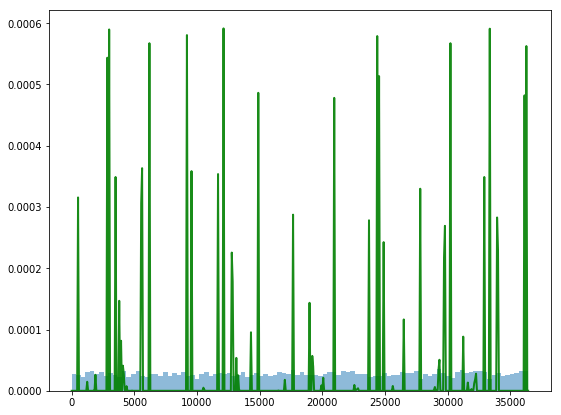

In [21]:
fig, ax2 = plt.subplots(figsize = (9,7))

#Plot histogram
ax2.hist(outliers_list, bins = 100, alpha = 0.5, density = True)
ax2.plot(grid, pdf, alpha = 0.9, color = 'green', linewidth = 2.0)
plt.show()

In [22]:
df = df.drop(np.asarray(outliers_list))

In [23]:
# Take a look at the outcome variable: Loan Status
print(df['Loan Status'].value_counts())

0.0    25336
1.0     6596
Name: Loan Status, dtype: int64


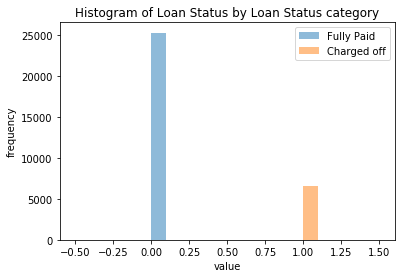

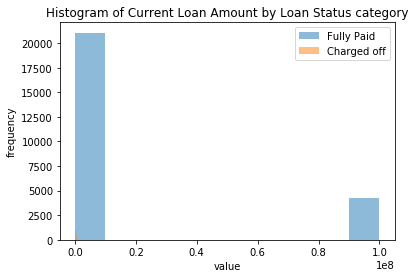

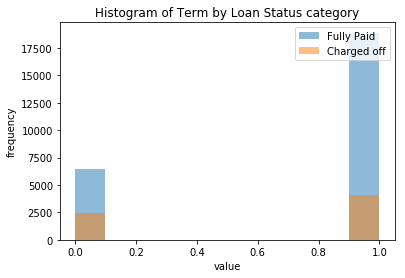

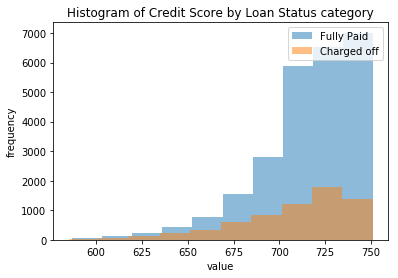

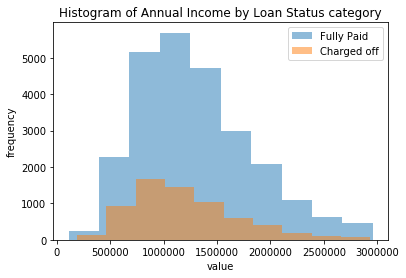

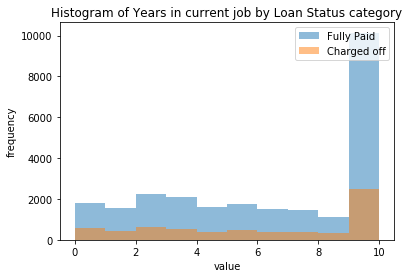

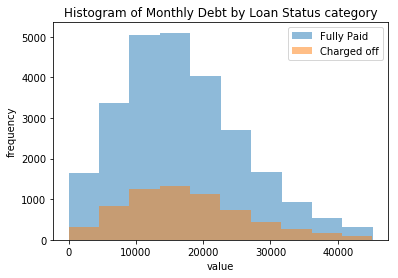

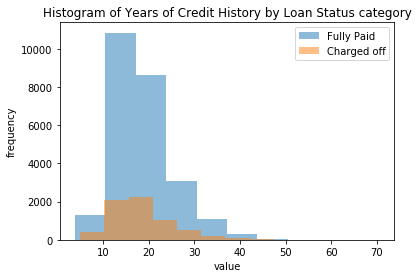

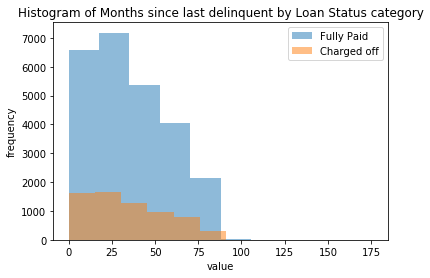

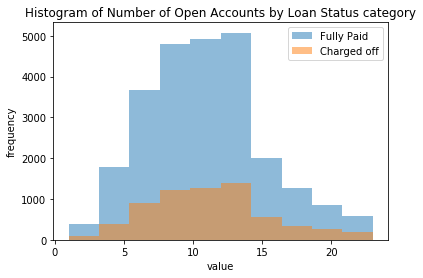

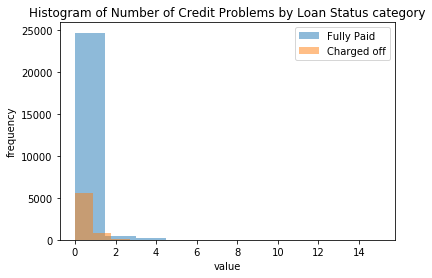

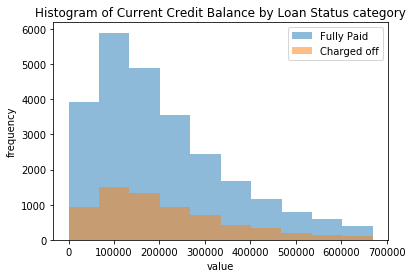

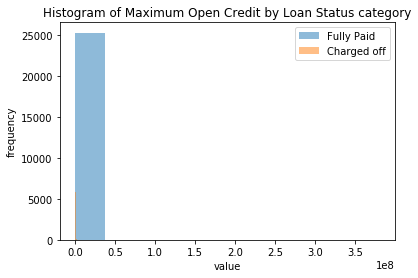

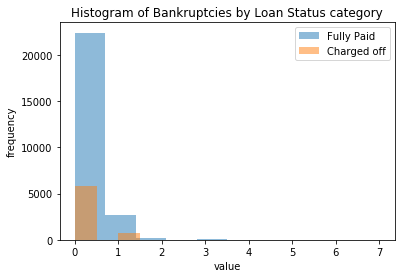

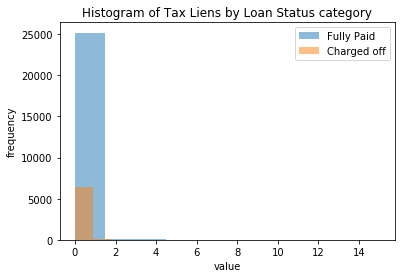

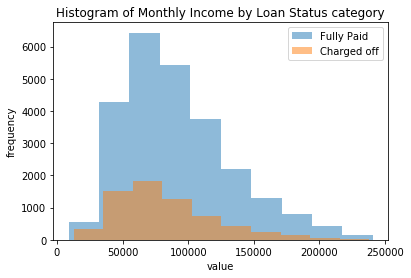

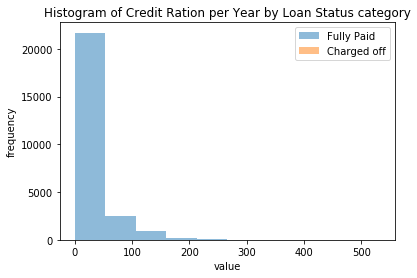

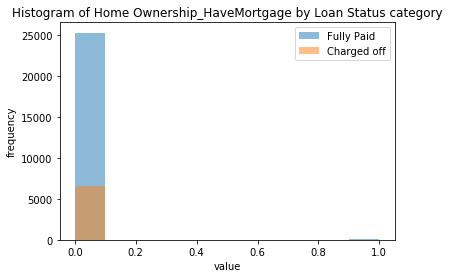

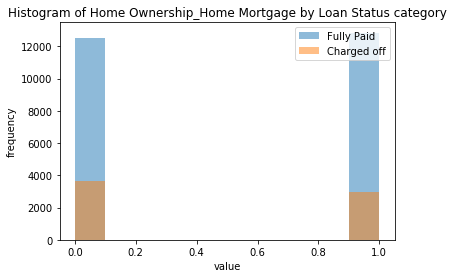

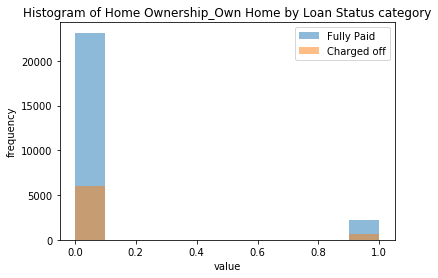

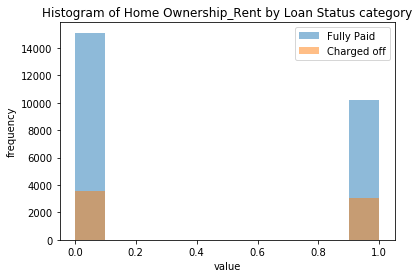

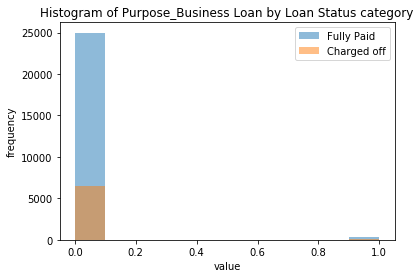

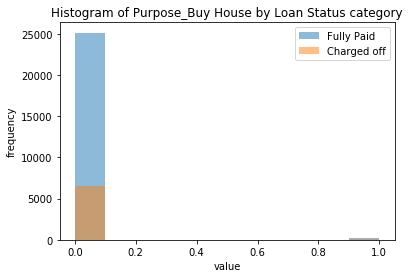

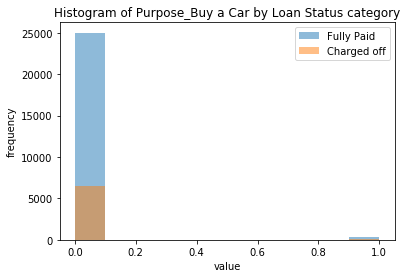

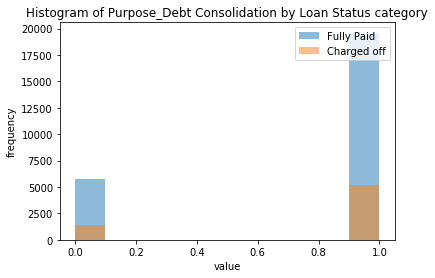

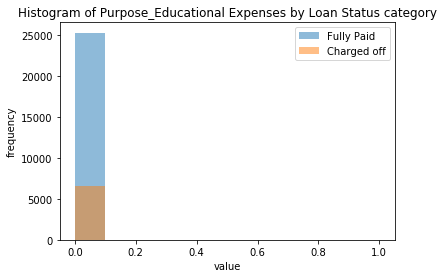

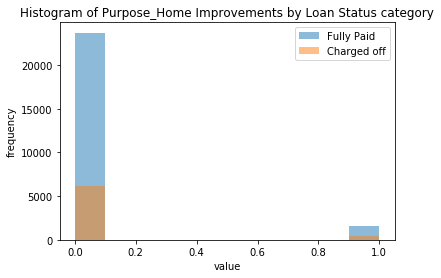

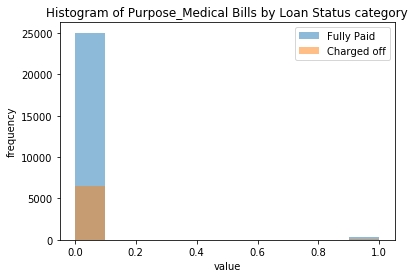

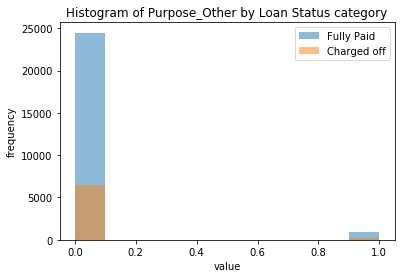

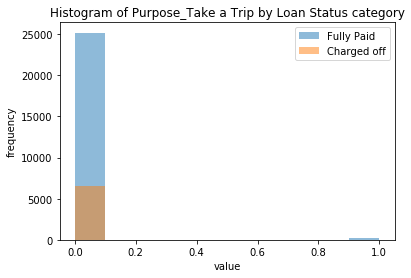

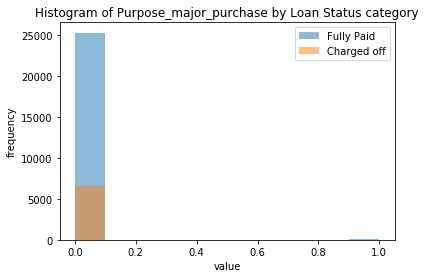

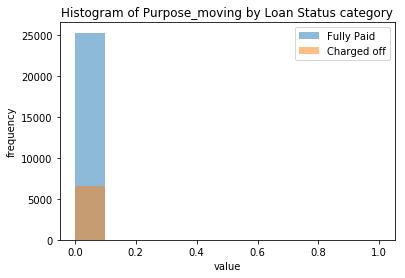

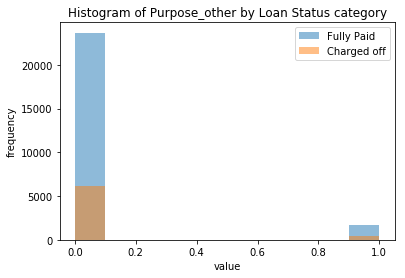

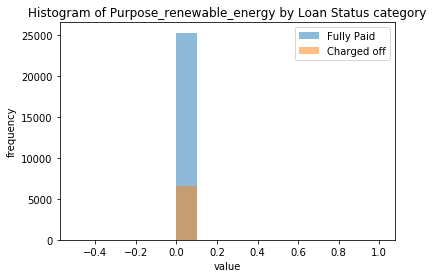

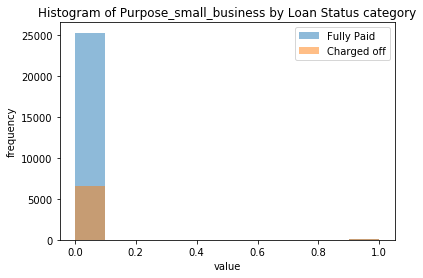

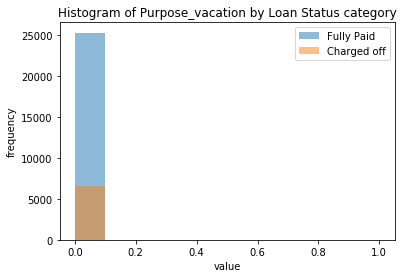

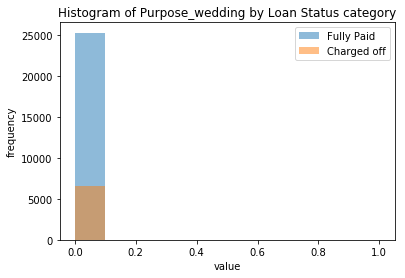

In [24]:
# Distribution of features : Histograms broken up by outcome categories (in this case Loan Status)
def plot_histogram(x,y):
    plt.hist(list(x[y==0]), alpha=0.5, label='Fully Paid')
    plt.hist(list(x[y==1]), alpha=0.5, label='Charged off')
    plt.title('Histogram of {0} by Loan Status category'.format(x.name))
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    plt.show()
    
for x in df.columns:
    plot_histogram(df[x],df["Loan Status"])

In [25]:
#calculate absolute correlation
corr_abs = abs(df.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

Loan Status
Loan Status                      1.000000
Current Loan Amount              0.200388
Credit Ration per Year           0.178674
Credit Score                     0.110044
Term                             0.109206
Monthly Income                   0.085715
Annual Income                    0.072575
Home Ownership_Home Mortgage     0.049023
Home Ownership_Rent              0.044691
Purpose_small_business           0.032191
Monthly Debt                     0.030860
Number of Open Accounts          0.030189
Years of Credit History          0.026183
Purpose_Other                    0.021118
Months since last delinquent     0.020664
Years in current job             0.019992
Purpose_Business Loan            0.018859
Purpose_moving                   0.018583
Purpose_Buy a Car                0.017755
Purpose_Debt Consolidation       0.011269
Purpose_Home Improvements        0.011212
Tax Liens                        0.010595
Purpose_Educational Expenses     0.010247
Home Ownership_Own Home          0.010122
Purpose_vacation                 0.008215
Maximum Open Credit              0.007919
Home Ownership_HaveMortgage      0.007737
Purpose_Medical Bills            0.007198
Bankruptcies                     0.006905
Purpose_Take a Trip              0.006562
Purpose_renewable_energy         0.005711
Current Credit Balance           0.005197
Purpose_other                    0.004588
Number of Credit Problems        0.001025
Purpose_major_purchase           0.000643
Purpose_Buy House                0.000251
Purpose_wedding                  0.000055

In [26]:
corr_abs["Loan Status"].sum(skipna=True)

2.2021589288764507

In [27]:
#save as processed 
df.to_csv(data_folder + "/" + dataset + "_processed__removeoutliers" + file_type)

## PCA Preprocessing

In [14]:
# read original data again
df = pd.read_csv(data_folder + "/" + dataset + "_processed" + file_type)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 37 columns):
Loan Status                     36423 non-null float64
Current Loan Amount             36423 non-null float64
Term                            36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Monthly Income                  36423 non-null float64
Credit Rati

In [15]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_Y = df["Loan Status"]
df_X = df.drop("Loan Status", axis=1)

# Standardizing the features
df_X = StandardScaler().fit_transform(df_X)

In [26]:
pca = PCA(n_components = len(df.columns)-1)
    
X_pca = pca.fit_transform(df_X)
    
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)
sum = 0
counter = 0
for var in ex_variance_ratio:
    counter += 1
    sum += var
    if sum > 0.90:
        break


[8.74701466e-02 5.63101166e-02 5.44004668e-02 5.22415558e-02
 4.81787230e-02 4.47316898e-02 3.92519159e-02 3.31283098e-02
 3.10496490e-02 2.94594831e-02 2.92211878e-02 2.85362473e-02
 2.83882615e-02 2.83225241e-02 2.81481906e-02 2.79271679e-02
 2.79042595e-02 2.78726443e-02 2.78374333e-02 2.77937953e-02
 2.77528180e-02 2.75248947e-02 2.73693276e-02 2.70032590e-02
 2.59554827e-02 2.47217323e-02 2.19702585e-02 1.81227969e-02
 1.32215944e-02 1.20901932e-02 1.03421301e-02 3.17077894e-03
 2.58096534e-03 1.72461256e-32 2.80744385e-33 1.21137698e-35]


In [27]:
pca = PCA(n_components = counter)
    
X_pca = pd.DataFrame(pca.fit_transform(df))
    
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 26 columns):
0     36423 non-null float64
1     36423 non-null float64
2     36423 non-null float64
3     36423 non-null float64
4     36423 non-null float64
5     36423 non-null float64
6     36423 non-null float64
7     36423 non-null float64
8     36423 non-null float64
9     36423 non-null float64
10    36423 non-null float64
11    36423 non-null float64
12    36423 non-null float64
13    36423 non-null float64
14    36423 non-null float64
15    36423 non-null float64
16    36423 non-null float64
17    36423 non-null float64
18    36423 non-null float64
19    36423 non-null float64
20    36423 non-null float64
21    36423 non-null float64
22    36423 non-null float64
23    36423 non-null float64
24    36423 non-null float64
25    36423 non-null float64
dtypes: float64(26)
memory usage: 7.2 MB


In [28]:
finalDf = pd.concat([X_pca, df_Y], axis = 1)

In [30]:
#save as processed 
finalDf.to_csv(data_folder + "/" + dataset + "_processed__PCA" + file_type)

## Feature Generation

In [14]:
from sklearn.preprocessing import StandardScaler

# read original data again and prepare for feature generation
df = pd.read_csv(data_folder + "/" + dataset + "_processed" + file_type)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df["index"] = df.index

target = df["Loan Status"]

df = df.drop("Loan Status", axis=1)

standard_scaler = StandardScaler()
df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

df.info()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 37 columns):
Current Loan Amount             36423 non-null float64
Term                            36423 non-null float64
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens                       36423 non-null float64
Monthly Income                  36423 non-null float64
Credit Ration per Year          36423 non-null float64
Home Owners

In [15]:
import featuretools as ft

df = df.loc[:,~df.columns.duplicated()]

es = ft.EntitySet("values_first")
from featuretools import variable_types as vtypes

es.entity_from_dataframe(entity_id="values_first",
                         dataframe=df, index="index")

Entityset: values_first
  Entities:
    values_first [Rows: 36423, Columns: 37]
  Relationships:
    No relationships

In [16]:
primitives = ft.list_primitives()

orig_cols = df.columns
trans_primitives = primitives[primitives['type'] == 'transform']["name"].values
print(ft.primitives.list_primitives())

#select some
trans_primitives = ['percentile', 'cum_min', 'add_numeric', 'less_than_equal_to', 'modulo_by_feature', 'subtract_numeric_scalar', 'not', 'diff', 'divide_by_feature', 'greater_than_equal_to', 'multiply_numeric_scalar', 'greater_than_scalar', 'cum_max', 'cum_count', 'greater_than_equal_to_scalar', 'modulo_numeric', 'subtract_numeric', 'absolute', 'less_than_scalar', 'scalar_subtract_numeric_feature', 'divide_numeric', 'cum_sum', 'not_equal_scalar', 'divide_numeric_scalar', 'modulo_numeric_scalar', 'add_numeric_scalar', 'greater_than', 'cum_mean', 'multiply_numeric']

                               name         type  \
0                               sum  aggregation   
1                              skew  aggregation   
2                               max  aggregation   
3                             count  aggregation   
4                              last  aggregation   
5                             trend  aggregation   
6                               min  aggregation   
7                          num_true  aggregation   
8                               std  aggregation   
9                   time_since_last  aggregation   
10                     percent_true  aggregation   
11                              all  aggregation   
12                           median  aggregation   
13                              any  aggregation   
14                       num_unique  aggregation   
15                             mode  aggregation   
16                 time_since_first  aggregation   
17                             mean  aggregation   
18          

In [51]:
# DFS with specified primitives
feature_matrix, features = ft.dfs(entityset = es, target_entity = 'values_first',
                       trans_primitives = trans_primitives,
                       where_primitives = [], seed_features = [],
                       n_jobs = 1, verbose = 1,
                       max_depth = 1, features_only=False)  #set max_depth = 1


Built 12288 features
Elapsed: 04:04 | Remaining: 00:00 | Progress: 100%|██████████████████████████████████████████| Calculated: 11/11 chunks


In [52]:
fm_encoded, features_encoded = ft.encode_features(feature_matrix,
                                                  features)
fm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 0 to 36422
Columns: 12288 entries, Loan Status to Home Ownership_Own Home != Months since last delinquent
dtypes: bool(7034), float64(5254)
memory usage: 1.7 GB


In [54]:
for col in fm_encoded.columns:
    if fm_encoded[col].dtype != np.float64:
        fm_encoded[col] = fm_encoded[col].astype(np.float64)

In [ ]:
corr_abs = abs(fm_encoded.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

In [ ]:
import sklearn.feature_selection 

#Such a large set of features may cause over fitting  and also slow computing
#Use feature selection  to select the most importatnt features

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(fm_encoded, df['Loan Status'])
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [fm_encoded.columns[i] for i in indices_selected]

FT = fm_encoded[colnames_selected]

In [ ]:
FT = FT.reset_index(drop=True).merge(df['Loan Status'].reset_index(drop=True), left_index=True, right_index=True)

In [ ]:
#save as processed 
FT.to_csv(data_folder + "/" + dataset + "_processed__FTs" + file_type)

## PolynomialFeatures

In [1]:
from sklearn.preprocessing import StandardScaler

# read original data again and prepare for feature generation
df = pd.read_csv(data_folder + "/" + dataset + "_processed" + file_type)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df["index"] = df.index

target = df["Loan Status"]

df = df.drop("Loan Status", axis=1)

standard_scaler = StandardScaler()
df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)

df.info()

NameError: name 'pd' is not defined

In [2]:
from itertools import combinations 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3,interaction_only=True)
poly_main = poly.fit_transform(df)
poly_main_names = poly.get_feature_names(df.columns)

X2 = pd.DataFrame(data=poly_main, columns=poly_main_names)

#The interactions amongst dummy variables belongiing to the same categorical feature are always zero
#Therefore, we have to remove those empty interaction terms

noint_indices = [i for i, x in enumerate(list((X2 == 0).all())) if x]
X2 = X2.drop(X2.columns[noint_indices], axis=1)

NameError: name 'df' is not defined

In [3]:
X2['Loan Status'] = target['Loan Status']

NameError: name 'target' is not defined

In [4]:
#absolute correlation matrix sorted with descending order
corr_abs = abs(X2.corr())
corr_abs[['Loan Status']].sort_values(by='Loan Status',ascending=False)

NameError: name 'X2' is not defined

In [5]:
X2 = X2.drop('Loan Status',1)

NameError: name 'X2' is not defined

In [6]:
import sklearn.feature_selection 

#Such a large set of features may cause over fitting  and also slow computing
#Use feature selection  to select the most importatnt features

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X2, target)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X2.columns[i] for i in indices_selected]

X_train_selected = X2[colnames_selected]

NameError: name 'X2' is not defined

In [7]:
X_train_selected.columns

NameError: name 'X_train_selected' is not defined

In [8]:
X_train_selected = X_train_selected.reset_index(drop=True).merge(taget.reset_index(drop=True), left_index=True, right_index=True)

NameError: name 'X_train_selected' is not defined

In [ ]:
#save as processed 
X_train_selected.to_csv(data_folder + "/" + dataset + "_processed__polynomial" + file_type)